In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.reload_library()
plt.style.use(['science', 'grid'])

In [2]:
# SETUP CONFIGURATION 
L = 10e-3 # H
C = 10e-9 # F
R1, R2, R3 = 10, 100, 1000 # Ohms
V0 = 1 # Volts 

In [3]:
# FUNCTIONS
frequency = lambda R, L, C : np.sqrt(1/(L*C) - (R/(2*L))**2)
phase = lambda R, L, w : np.arctan2(-R,2*L*w)
charge_0 = lambda C, V0, phi : C*V0/(np.cos(phi)) 
charge = lambda Q0, R, L, w, phi, t : Q0*np.exp(-R*t/(2*L))*np.cos(w*t + phi)

# CALCULATING w, phase, AND Q0
w1, w2, w3 = frequency(R1, L, C), frequency(R2, L, C), frequency(R3, L, C)
phase1, phase2, phase3 = phase(R1, L, w1), phase(R2, L, w2), phase(R3, L, w3)
Q0_1, Q0_2, Q0_3 = charge_0(C, V0, phase1), charge_0(C, V0, phase2), charge_0(C, V0, phase3)

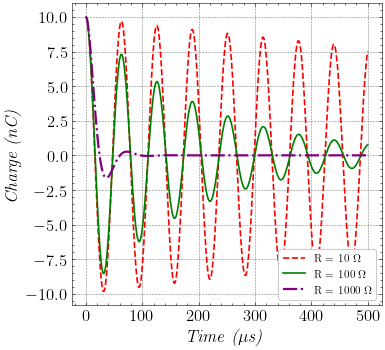

In [68]:
# GENERATING PLOT
fig = plt.figure(figsize=(5, 5), dpi=80)
time_range = np.arange(0, 0.5*1e-3, 1e-6)

plt.plot(1e6*time_range, 1e9*charge(Q0_1, R1, L, w1, phase1, time_range), '--', color='red',linewidth=1.5, label='R = ' + str(R1) + ' $\Omega$')
plt.plot(1e6*time_range, 1e9*charge(Q0_2, R2, L, w2, phase2, time_range), '-',color='green',linewidth=1.5, label='R = ' + str(R2) + ' $\Omega$')
plt.plot(1e6*time_range, 1e9*charge(Q0_3, R3, L, w3, phase3, time_range), '-.', color='purple',linewidth=2, label='R = ' + str(R3) + ' $\Omega$')

plt.legend(prop={'size': 10}, loc=4)

plt.xlabel(r'$\textit{Time ($\mu$s)}$', fontsize = 16)
plt.ylabel(r'$\textit{Charge (nC)}$', fontsize = 16)
#plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.savefig('figure.jpg')
plt.show()